In [ ]:
import pandas as pd

data = pd.read_csv('apple_quality.csv')

data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# Q1

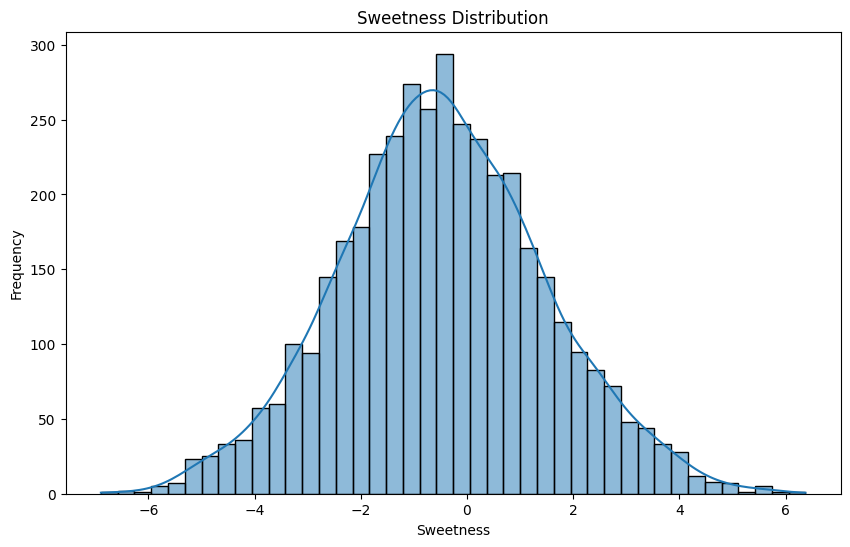

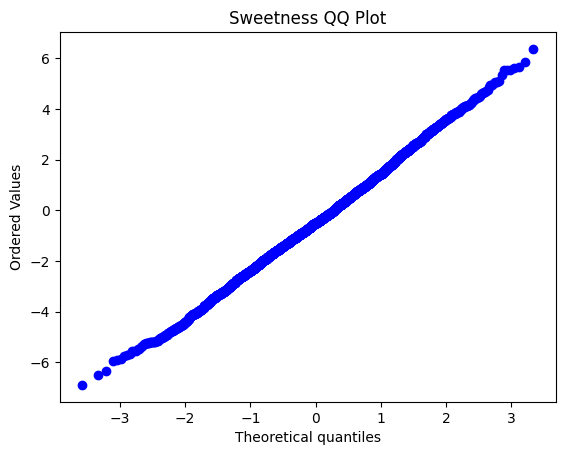

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(10, 6))
sns.histplot(data['Sweetness'], kde=True)
plt.title('Sweetness Distribution')
plt.xlabel('Sweetness')
plt.ylabel('Frequency')
plt.show()

stats.probplot(data['Sweetness'], dist="norm", plot=plt)
plt.title('Sweetness QQ Plot')
plt.show()


In [ ]:
import pymc as pm
import numpy as np
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:

    theta = pm.Normal('theta', mu=0, sigma=1)
    tau = pm.Gamma('tau', alpha=1, beta=1)

    observation = pm.Normal('observation', mu=theta, tau=tau, observed=data['Sweetness'])

/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in observation contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [ ]:
with normal_gamma_toy_model:
    idata_HMC = pm.sample() # default is the NUTS implementation of HMC

In [ ]:
with normal_gamma_toy_model:
    MH = pm.Metropolis([theta, tau], S=np.array([0.1]), tune=False, tune_interval=0)
    idata_MH = pm.sample(step=MH) # force MH

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


                            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
theta                     -0.470  0.030  -0.523   -0.411      0.001     0.00   
observation_unobserved[0] -0.473  1.837  -3.926    2.967      0.034     0.04   
tau                        0.265  0.006   0.254    0.276      0.000     0.00   
observation[0]             5.346  0.000   5.346    5.346      0.000     0.00   
observation[1]             3.664  0.000   3.664    3.664      0.000     0.00   
...                          ...    ...     ...      ...        ...      ...   
observation[3996]         -0.204  0.000  -0.204   -0.204      0.000     0.00   
observation[3997]         -2.440  0.000  -2.440   -2.440      0.000     0.00   
observation[3998]          2.366  0.000   2.366    2.366      0.000     0.00   
observation[3999]          0.121  0.000   0.121    0.121      0.000     0.00   
observation[4000]         -0.473  1.837  -3.926    2.967      0.034     0.04   

                           ess_bulk  es

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'observation_unobserved'}>,
        <Axes: title={'center': 'observation_unobserved'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'observation'}>,
        <Axes: title={'center': 'observation'}>]], dtype=object)

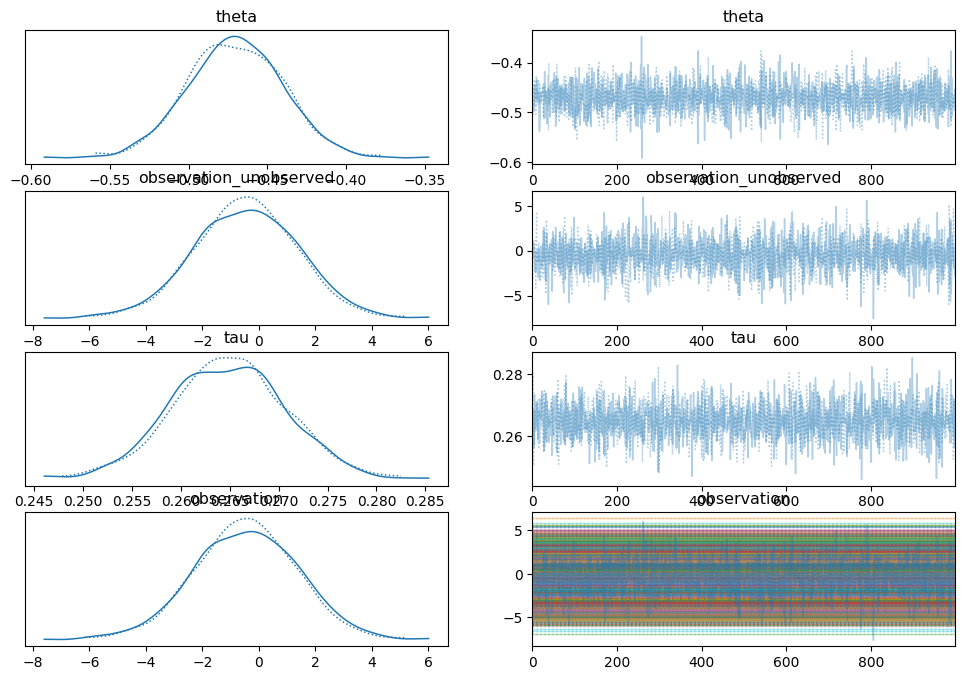

In [ ]:
import arviz as az

# 使用 ArviZ 生成后验分析的摘要
summary = az.summary(idata_HMC)
print(summary)

# 可视化迹图
az.plot_trace(idata_HMC)



# Q2/Q3/Q4
use the column quantity

/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in quality_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


                            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
quality_obs_unobserved[0]  0.500  0.500   0.000    1.000      0.004    0.003   
p                          0.499  0.008   0.484    0.513      0.000    0.000   
quality_obs[0]             0.000  0.000   0.000    0.000      0.000    0.000   
quality_obs[1]             0.000  0.000   0.000    0.000      0.000    0.000   
quality_obs[2]             1.000  0.000   1.000    1.000      0.000    0.000   
...                          ...    ...     ...      ...        ...      ...   
quality_obs[3996]          0.000  0.000   0.000    0.000      0.000    0.000   
quality_obs[3997]          1.000  0.000   1.000    1.000      0.000    0.000   
quality_obs[3998]          0.000  0.000   0.000    0.000      0.000    0.000   
quality_obs[3999]          0.000  0.000   0.000    0.000      0.000    0.000   
quality_obs[4000]          0.500  0.500   0.000    1.000      0.004    0.003   

                           ess_bulk  es

array([[<Axes: title={'center': 'quality_obs_unobserved'}>,
        <Axes: title={'center': 'quality_obs_unobserved'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>],
       [<Axes: title={'center': 'quality_obs'}>,
        <Axes: title={'center': 'quality_obs'}>]], dtype=object)

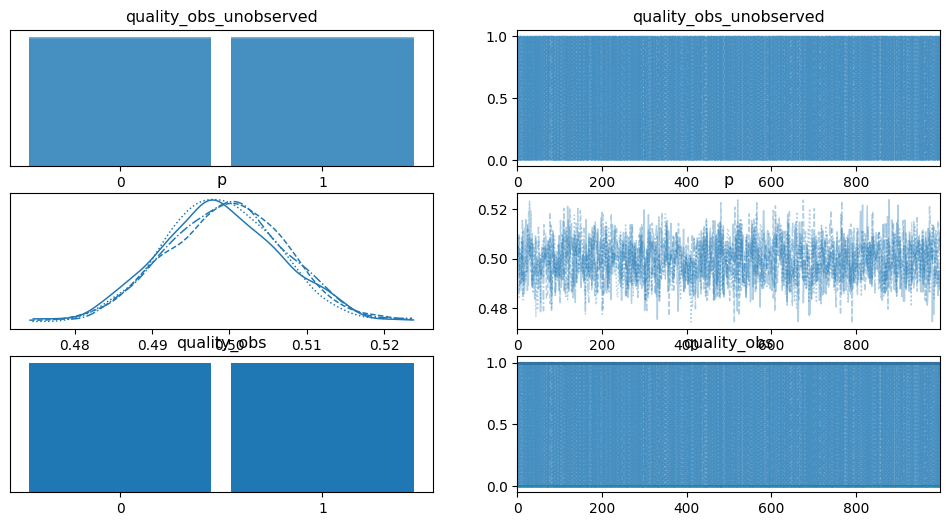

In [ ]:
import pymc as pm

data['Quality_coded'] = data['Quality'].replace({'good': 0, 'bad': 1})

with pm.Model() as non_normal_model:
    p = pm.Beta('p', alpha=2, beta=2)

    quality_obs = pm.Bernoulli('quality_obs', p=p, observed=data['Quality_coded'])

    trace_non_normal = pm.sample(1000, chains=4)

summary_non_normal = az.summary(trace_non_normal)
print(summary_non_normal)

az.plot_trace(trace_non_normal)


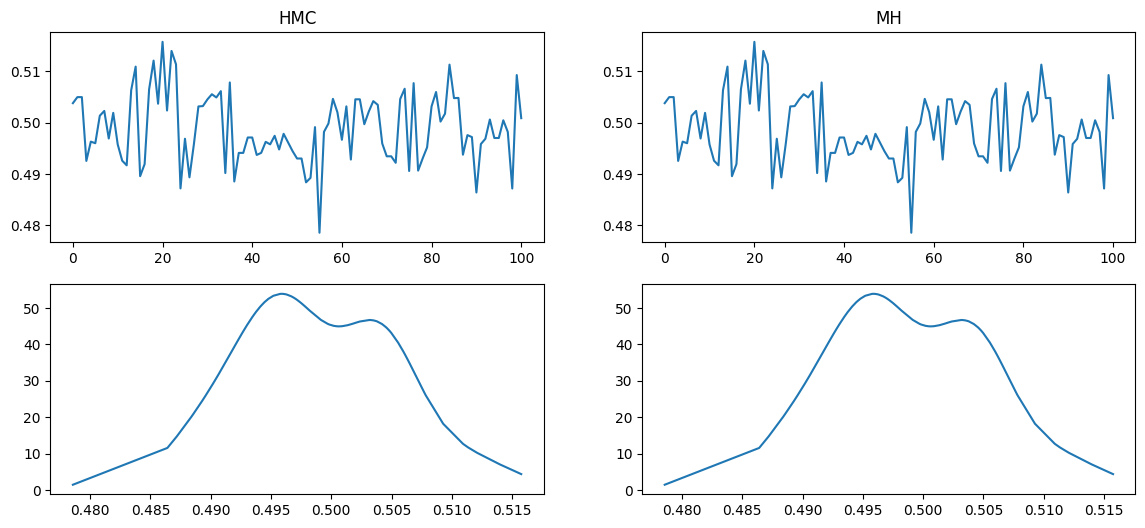

In [22]:
from scipy.stats import gaussian_kde; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,2, figsize=(14,6))
n_mcmc_samples = 100
mcmc_chain = trace_non_normal.posterior["p"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0,0].plot(mcmc_chain); ax[1,0].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted)); ax[0,0].set_title("HMC");
mcmc_chain = trace_non_normal.posterior["p"].sel(chain=0, draw=slice(0, n_mcmc_samples)).values; mcmc_chain_sorted = sorted(mcmc_chain)
ax[0,1].plot(mcmc_chain); ax[1,1].plot(mcmc_chain_sorted,gaussian_kde(mcmc_chain_sorted)(mcmc_chain_sorted)); ax[0,1].set_title("MH");

array([<Axes: title={'center': 'p\n0'}>, <Axes: title={'center': 'p\n1'}>,
       <Axes: title={'center': 'p\n2'}>, <Axes: title={'center': 'p\n3'}>],
      dtype=object)

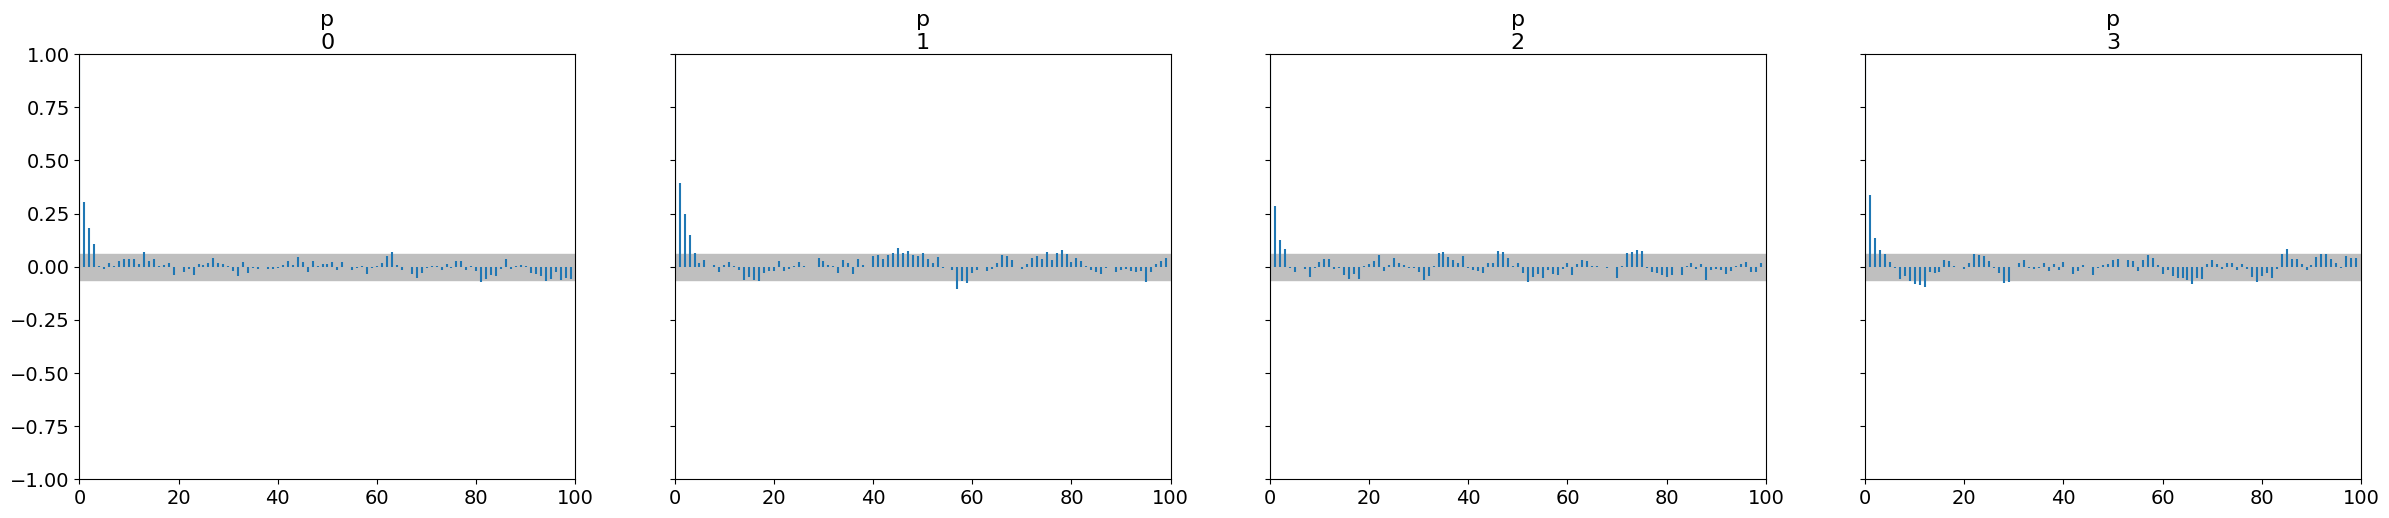

In [17]:
az.plot_autocorr(trace_non_normal, var_names=['p'])

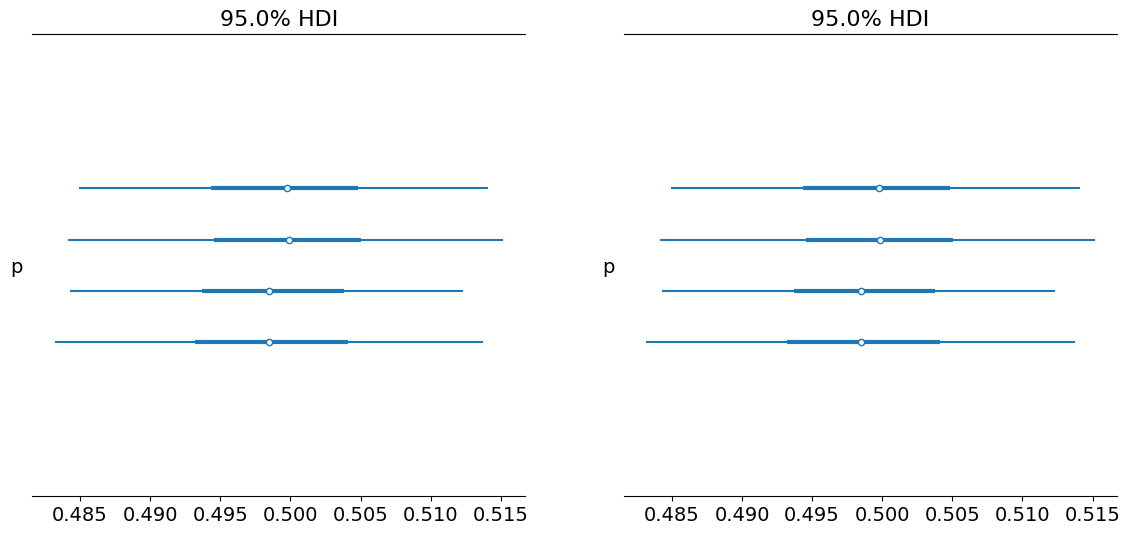

In [19]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(1,2, figsize=(14,6))
az.plot_forest(trace_non_normal, var_names=["p"], combined=False, hdi_prob=0.95, ax=ax[0]);
az.plot_forest(trace_non_normal, var_names=["p"], combined=False, hdi_prob=0.95, ax=ax[1]);

In [20]:
print("number of MCMC samples:", trace_non_normal.posterior['p'].values.flatten().shape[-1])
az.summary(trace_non_normal, round_to=2)

number of MCMC samples: 4000


/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
quality_obs_unobserved[0],0.5,0.50,0.00,1.00,0.0,0.0,14408.24,4000.0,1.0
p,0.5,0.01,0.48,0.51,0.0,0.0,1742.76,2662.7,1.0
quality_obs[0],0.0,0.00,0.00,0.00,0.0,0.0,4000.00,4000.0,NaN
quality_obs[1],0.0,0.00,0.00,0.00,0.0,0.0,4000.00,4000.0,NaN
quality_obs[2],1.0,0.00,1.00,1.00,0.0,0.0,4000.00,4000.0,NaN
...,...,...,...,...,...,...,...,...,...
quality_obs[3996],0.0,0.00,0.00,0.00,0.0,0.0,4000.00,4000.0,NaN
quality_obs[3997],1.0,0.00,1.00,1.00,0.0,0.0,4000.00,4000.0,NaN
quality_obs[3998],0.0,0.00,0.00,0.00,0.0,0.0,4000.00,4000.0,NaN
quality_obs[3999],0.0,0.00,0.00,0.00,0.0,0.0,4000.00,4000.0,NaN


# 新段落